In [ ]:
!pip uninstall -y numpy pandas scipy scikit-learn tensorflow ydata-profiling ultralytics

!pip install "numpy<2.0" "pandas<2.2" "scikit-learn<1.4" "scipy" "seaborn" "matplotlib" "ultralytics"

print("\n Version Installed, Restart Session")

In [1]:
import ultralytics
from ultralytics import YOLO, settings
import os
import shutil
import yaml
import json
import glob
import numpy as np
import torch
import random
from PIL import Image
import PIL.Image
from tqdm.notebook import tqdm
from IPython.display import Image, display
from collections import Counter
from sklearn.model_selection import train_test_split

In [ ]:
print(f"✅ Numpy Version: {np.__version__}")
print(f"✅ Torch Version: {torch.__version__}")

In [2]:
folder = '/kaggle/working'

print(f"Cleaning {folder}...")

for filename in os.listdir(folder):
    
    file_path = os.path.join(folder, filename)
    try:
        if os.path.isfile(file_path) or os.path.islink(file_path):
            os.unlink(file_path)
        elif os.path.isdir(file_path):
            shutil.rmtree(file_path)
    except Exception as e:
        print(f'Failed Cleaning {file_path}. Reason: {e}')

print("Finished! Folder is empty.")

Cleaning /kaggle/working...
Finished! Folder is empty.


In [3]:
settings.update({'raytune': False})
print("Ray Tune integration disabled.")

ultralytics.checks()
print("\n Setup finished. GPU Ready.")

Ultralytics 8.4.6 🚀 Python-3.12.12 torch-2.8.0+cu126 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
Setup complete ✅ (4 CPUs, 31.4 GB RAM, 6634.8/8062.4 GB disk)

 Setup finished. GPU Ready.


In [4]:
#TRAINING
print("\n Train Starting...")
model = YOLO("yolov8s.pt")

model.train(
    data="/kaggle/input/telecomunication-provider-infrastructure-synthetic/data.yaml",
    epochs=100,
    imgsz=1240,
    batch=16,
    device=0,
    project="provider_project",
    name="aug_run",
    exist_ok=True,
    patience=100, 

    # --- AUGMENTATION SETTINGS ---
    hsv_h=0.015,     # HUE: Ubah sangat sedikit. JANGAN ubah warna marker (Merah tetep Merah).
    hsv_s=0.7,       # SATURATION: Tiang berkarat/pudar warnanya (0.7 = variasi 70%).
    hsv_v=0.4,       # VALUE: Simulasi kondisi cahaya (siang terik vs mendung).
    degrees=5.0,     # ROTASI: Tiang kadang miring dikit, tapi jangan sampai tidur (max 5 derajat).
    translate=0.1,   # GESER: Geser objek vertikal/horizontal.
    scale=0.5,       # SCALE: Penting! Biar model kenal tiang yang jauh (kecil) dan dekat (besar).
    shear=0.0,       # SHEAR: Tidak terlalu perlu untuk tiang.
    perspective=0.0, # PERSPECTIVE: Nol-kan saja biar tidak pusing.
    flipud=0.0,      # FLIP UP-DOWN: MATIKAN. Tiang provider tidak pernah terbalik vertikal.
    fliplr=0.5,      # FLIP LEFT-RIGHT: 50% chance. Tiang dilihat dari kiri/kanan sama saja.
    mosaic=0.5,      # MOSAIC: WAJIB 100% untuk dataset kecil. Menggabungkan 4 image jadi 1.
    mixup=0.1,       # MIXUP: Bantu atasi overlap tiang yang menumpuk.
    copy_paste=0.1,  # COPY-PASTE: Bagus untuk segmentasi, lumayan untuk deteksi.
    erasing=0.4,     # ERASING: INI KUNCINYA. Simulasi oklusi (tertutup poster sedot WC/pohon).
)


 Train Starting...
Ultralytics 8.4.6 🚀 Python-3.12.12 torch-2.8.0+cu126 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
engine/trainer: agnostic_nms=False, amp=True, angle=1.0, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.1, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/kaggle/input/telecomunication-provider-infrastructure-synthetic/data.yaml, degrees=5.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=100, erasing=0.4, exist_ok=True, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=1240, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.1, mode=train, model=yolov8s.pt, momentum=0.937, mosaic=0.5, multi_scale=0.0, name=aug_run, nbs=64, nms=False, opset=None, optimize=False,

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3, 4])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x79fc1899b710>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
        

In [5]:
#Validation
best_model_path = "/kaggle/working/provider_project/aug_run/weights/best.pt"
model_best = YOLO(best_model_path)

print("\nBest Model Evaluation:")
metrics = model_best.val(
    data="/kaggle/input/telecomunication-provider-infrastructure-synthetic/data.yaml",
    augment=True
)

print(f"\n mAP50: {metrics.box.map50}")
print(f" mAP50-95: {metrics.box.map}")


Best Model Evaluation:
Ultralytics 8.4.6 🚀 Python-3.12.12 torch-2.8.0+cu126 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
Model summary (fused): 73 layers, 11,127,519 parameters, 0 gradients, 28.4 GFLOPs
val: Fast image access ✅ (ping: 0.2±0.2 ms, read: 3040.0±161.7 MB/s, size: 5162.2 KB)
val: Scanning /kaggle/input/telecomunication-provider-infrastructure-synthetic/labels/val... 32 images, 0 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 32/32 810.7it/s 0.0s
WARNING ⚠️ val: Cache directory /kaggle/input/telecomunication-provider-infrastructure-synthetic/labels is not writable, cache not saved.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 2/2 3.0s/it 6.0s<14.6s
                   all         32         55      0.779      0.714      0.763      0.467
              Indihome         15         16      0.706       0.75        0.7      0.357
               Indosat          4          4      0.826       0.75      0.945      0.636
          

In [ ]:
data_dir="/kaggle/input/telecomunication-provider-infrastructure-synthetic"

In [ ]:
val_images = glob.glob(f"{data_dir}/images/val/*")
sample_images = random.sample(val_images, 3) if len(val_images) >= 3 else val_images

print("Inference Sample...")

results = model_best.predict(
    source=sample_images,
    conf=0.4,
    save=True,
    project="provider-marker",
    name="inference_test",
    exist_ok=True
)

from IPython.display import Image, display

print("\nDetection Result:")
for img_path in glob.glob("/kaggle/working/provider-marker/inference_test/*.jpg"):
    display(Image(filename=img_path, width=600))

⚙️ Memuat model...

image 1/1 /kaggle/input/telecomunication-provider-infrastructure-synthetic/images/test/test_0001.jpeg: 704x1248 2 Indosats, 1 MyRepublic, 1 CBN, 12.9ms
Speed: 5.8ms preprocess, 12.9ms inference, 1.3ms postprocess per image at shape (1, 3, 704, 1248)
Results saved to /kaggle/working/provider_single_test/test_result

✅ Menampilkan hasil dari: /kaggle/working/provider_single_test/test_result/test_0001.jpg


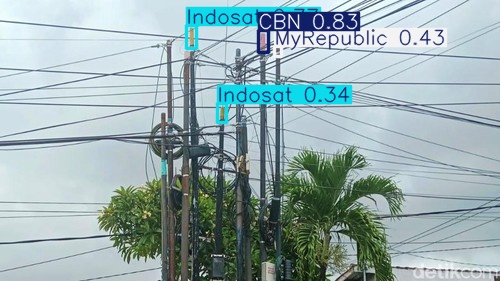

In [9]:
from ultralytics import YOLO
from IPython.display import Image, display
import os

model_path = "/kaggle/input/yolov8s-telecom-provider-infrastructure-synth/pytorch/default/1/provider_yolov8s_v.2.1(0.763).pt"
source_img = "/kaggle/input/telecomunication-provider-infrastructure-synthetic/images/test/test_0001.jpeg"


print("⚙️ Memuat model...")
model = YOLO(model_path)

results = model.predict(
    source=source_img,
    conf=0.25,
    save=True,
    
    project="provider_single_test",  # Folder Induk
    name="test_result",              # Sub-folder
    exist_ok=True                    # Wajib True agar tidak membuat folder 'test_result2'
)

saved_file = "/kaggle/working/provider_single_test/test_result/test_0001.jpg"

print(f"\n✅ Menampilkan hasil dari: {saved_file}")

if os.path.exists(saved_file):
    display(Image(filename=saved_file, width=800))
else:
    print(f"❌ Aneh, file tidak ditemukan di {saved_file}. Cek log di atas.")